<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h4 style="color:#303030"> Python for Data Science, Homework, template: </h4> </center>
<center> <h1 style="color:#303030">Predict the quality of white wine from its physico-chemical properties</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center style="color:#303030"><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal:</strong> Practice Linear Regression on wine data</p>
        <strong> Sections:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href="#SU">Set Up </a> </li>
            <li> <a style="color:#303030" href="#P1">Exploratory Data Analysis</a></li>
            <li> <a style="color:#303030" href="#P2">Modeling</a></li>
        </ol>
        <strong>Topics Trained:</strong> Clustering.
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/" title="momentum"> SIT Introduction to Data Science</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week2/day1/index.html" title="momentum">Week 2 Day 1, Applied Machine Learning</a>|
        <a style="color:#00BAE5" href="https://colab.research.google.com/drive/1DK68oHRR2-5IiZ2SG7OTS2cCFSe-RpeE?usp=sharing" title="momentum"> Assignment, Wine Quality Prediction</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

Team members:
Anastasiya Fokina
Emily Achieng
Mohammad Naim Dahee

In [1]:
!pip install shap

In [2]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [3]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [4]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0    924      0 --:--:-- --:--:-- --:--:--   924


In [5]:
!pip install pipelineprofiler

In [6]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import set_config

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures



import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
data_path = "/content/drive/MyDrive/Data Science/Introduction2DataScience/tutorials/"

In [13]:
pd.set_option('display.max_rows', 20)

In [15]:
set_config(display='diagram')

_Your Comments here_

Please Download the data from [this source](https://drive.google.com/file/d/1gncbcW3ow8vDz_eyrvgDYwiMgNrsgwzz/view?usp=sharing), and upload it on your Introduction2DS/data google drive folder.

<a id='P1' name="P1"></a>
## [Exploratory Data Analysis](#P0)


### Understand the Context

**What type of problem are we trying to solve?**

With this data set, we want to build a model that would predict the quality of a wine from its physico-chemical characteristics. 

**_This can be treated either as a classification or a regression problem_**

**How was the data collected?/ Is there documentation on the Data?**

Red wine dataset description: 

**Context**:

The acidity, alcohol content, as well as other components contents have been measured on wine samples and are reported along with the quality of said wine. the question is: how well can we predict the quality of a wine from these measurements?


**Content**:  

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

**Do we have assumption about the data?**

_Your answer here_

**Can we foresee any challenge related to this data set?**

_Your answer here_

### Data Structure and types

**Load the csv file as a DataFrame using Pandas**

In [16]:
wine = pd.read_csv(f'{data_path}winequality-red.csv', sep=';')

**How many columns and rows do we have?**

In [17]:
wine.shape

(1599, 12)

**What are the names and meaning of each columns?**

In [18]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

print the first 10 rows of the dataframe

In [19]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**What are the types of each column?**

In [20]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have only numerical features

**Do the types correspond to what you expected?
if not, which columns would you change and why?**

Everything is great. All the properties of wine will be expressed by numerical values.

**Perform the necessary type transformations**

In [21]:
#no

**What are the possible categories for categorical columns?/What is the 
min, max and mean of each numerical columns?**

In [22]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


_Your Comments here_

**Perform test/train split here**

!!! Please think about it!!! How should the data be splitted?

Lets chack for dataset for NaN

In [23]:
from sklearn.impute import SimpleImputer

#checking for missing values
print ('Total amount of missing values is', pd.isna(wine).sum().sum())

Total amount of missing values is 0


Cool! Then, we should predict how good wine is, so label is "quality colimn", all other are features - I dont see any unimportant or out of topic columns.

In [24]:


train, test = train_test_split(wine, test_size=0.2, random_state=0)
train_features = train.drop(['quality'],axis = 1)


### Missing Values and Duplicates

**Are there some duplicate columns? rows?**

In [25]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There is no duplicate columns.

In [27]:
wine.duplicated().value_counts()

False    1359
True      240
dtype: int64

There are 240 duplicate rows. Ive concidered all dataset. \
For train set :

In [28]:
train.duplicated().value_counts()

False    1122
True      157
dtype: int64

**Should we drop duplicate rows?**

In [29]:
duplicates = (train[train.duplicated(keep=False)] # select all the duplicated rows
              .groupby(by=list(train.columns)) # group matching rows
              .size() # counts how many duplicates for each specific row value
              .reset_index() # reshape the result as a DataFrame
              .rename(columns={0:'DuplicatesNumber'}) # rename the duplicates number colums as 'DuplicatesNumber'
              ) 
duplicates.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,DuplicatesNumber
0,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,2
1,5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5,2
2,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,2
3,6.2,0.36,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.7,6,2
4,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,2


In [30]:
duplicates['DuplicatesNumber'].describe()

count    146.000000
mean       2.075342
std        0.312622
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: DuplicatesNumber, dtype: float64

I think we should not drop duplicate rows. There is no big difference.

**How many missing values are there in each columns?**

Ive checked it earlier, but lets use other method

In [31]:
train.count()

fixed acidity           1279
volatile acidity        1279
citric acid             1279
residual sugar          1279
chlorides               1279
free sulfur dioxide     1279
total sulfur dioxide    1279
density                 1279
pH                      1279
sulphates               1279
alcohol                 1279
quality                 1279
dtype: int64

The same result.

### Data Distribution and Outliers

**What is the distribution of numerical/categorical data?**

In [32]:
train_features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.337373,0.530000,0.272181,2.553167,0.087024,16.032838,47.114152,0.996757,3.309828,0.659077,10.413995
std,1.734938,0.182544,0.195608,1.452549,0.047801,10.520943,33.584207,0.001882,0.153968,0.174846,1.061308
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995620,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000
75%,9.300000,0.637500,0.420000,2.600000,0.090000,21.000000,63.000000,0.997855,3.400000,0.730000,11.083333
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [33]:
#histograms
for col in train_features.columns:
  fig = px.histogram(train_features, x=col, nbins=5000)
  fig.show()

In [34]:
#boxplots
for col in train_features.columns:
  fig = px.box(train_features, x=col)
  fig.show()

**Are there clear outliers?**

In [35]:
train_features[ (train_features['fixed acidity'] > 13.4) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4


In [36]:
train_features[(train_features['volatile acidity'] > 1.13) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5


In [37]:
train_features [(train_features['citric acid'] > 0.78)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4


In [38]:
train_features[ (train_features['residual sugar'] > 8.9)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2


In [39]:
train_features[((train_features['chlorides'] > 0.27) | (train_features['chlorides'] < 0.038))]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
692,8.6,0.490,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4
1165,8.5,0.440,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4
1319,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5
754,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1
451,8.4,0.370,0.53,1.8,0.413,9.0,26.0,0.99790,3.06,1.06,9.1
836,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7


In [40]:
train_features[ (train_features['free sulfur dioxide'] > 57.0) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9


In [41]:
train_features[(train_features['total sulfur dioxide'] > 160.0)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3


In [42]:
train_features[(train_features['density'] < 0.991) | (train_features['density'] > 1.0015)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0
1018,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0
836,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7


In [43]:
train_features[(train_features['pH'] < 2.86) | (train_features['pH'] > 3.72)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9
1321,5.0,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5
1300,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.5
1111,5.4,0.420,0.27,2.00,0.092,23.0,55.0,0.99471,3.78,0.64,12.3
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5
1316,5.4,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4


In [44]:
train_features[(train_features['sulphates'] > 1.36)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.9972,2.93,1.98,9.8
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.9965,2.94,1.62,9.5
226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.9964,3.04,1.61,9.5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.9964,3.00,1.59,9.5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4


In [45]:
train_features[(train_features['alcohol'] > 13.4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000
1477,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.600000
1475,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000


Your Comments here_

**Can we rule out some outliers as mistakes in the data collecting process?**

_Your answer here_

**How should we deal with outliers?**

I should get rid of them during a segmentation.

### Relationship between features (correlations)

**What are the relationships between features (make a pairplot)? Are they linear?**

In [ ]:

seaborn.pairplot(train_features, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

In [ ]:
train_features.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.275915,0.676129,0.117862,0.085662,-0.159364,-0.120449,0.657913,-0.679056,0.176279,-0.055725
volatile acidity,-0.275915,1.000000,-0.549642,0.009490,0.052602,0.005741,0.082385,0.008826,0.257278,-0.255571,-0.177555
citric acid,0.676129,-0.549642,1.000000,0.142106,0.213882,-0.071359,0.028341,0.368571,-0.541419,0.315346,0.105826
residual sugar,0.117862,0.009490,0.142106,1.000000,0.074685,0.221479,0.215481,0.376888,-0.094356,0.014920,0.020335
chlorides,0.085662,0.052602,0.213882,0.074685,1.000000,0.025966,0.052407,0.201348,-0.255225,0.366476,-0.206436
free sulfur dioxide,-0.159364,0.005741,-0.071359,0.221479,0.025966,1.000000,0.665879,-0.001607,0.067064,0.046926,-0.092512
total sulfur dioxide,-0.120449,0.082385,0.028341,0.215481,0.052407,0.665879,1.000000,0.078787,-0.070467,0.051698,-0.210060
density,0.657913,0.008826,0.368571,0.376888,0.201348,-0.001607,0.078787,1.000000,-0.333858,0.153594,-0.493136
pH,-0.679056,0.257278,-0.541419,-0.094356,-0.255225,0.067064,-0.070467,-0.333858,1.000000,-0.198172,0.199708
sulphates,0.176279,-0.255571,0.315346,0.014920,0.366476,0.046926,0.051698,0.153594,-0.198172,1.000000,0.097777


Lets consider cells with coefficient > 0.5

In [ ]:
fig = px.scatter(train_features, x="free sulfur dioxide", y="total sulfur dioxide")
fig.show()

In [ ]:
fig = px.scatter(train_features, x="citric acid", y="fixed acidity")
fig.show()

In [ ]:
fig = px.scatter(train_features, x="density", y="fixed acidity")
fig.show()

In [ ]:
fig = px.scatter(train_features, x="pH", y="fixed acidity")
fig.show()

In [ ]:
fig = px.scatter(train_features, y="pH", x="citric acid")
fig.show()

In [ ]:
fig = px.scatter(train_features, x="citric acid", y="volatile acidity")
fig.show()

**What correlation coefficients should be computed?**

There are no stong corellations

**Is there risk of data leakage?**

No

### Feature Creation and Combination



- **What kind of Scaling should we use/try?**
- **Should we transform some features?**
- **Should we drop some features?**
- **Should we combine features?**

Lets choose Standart Scaler.
We can use, for example, Polynomial Features as transformation to increase number of features ( with no high degree)
I will not drop or combine features as they are not highly correlated.

Lets get rid of outliers

In [ ]:
train_no_out = train[ (train['fixed acidity'] <= 13.4) ]
train_no_out = train_no_out [(train_no_out['volatile acidity'] <= 1.13) ]
train_no_out = train_no_out [(train_no_out['citric acid'] <= 0.78) ]
train_no_out = train_no_out [(train_no_out['chlorides'] <= 0.27) | (train_no_out['chlorides'] >= 0.038)]
train_no_out = train_no_out [(train_no_out['free sulfur dioxide'] <= 57.0) ]
train_no_out = train_no_out [(train_no_out['total sulfur dioxide'] <= 160.0)]
train_no_out = train_no_out [(train_no_out['density'] >= 0.991) | (train_no_out['density'] <= 1.0015)]
train_no_out = train_no_out [(train_no_out['pH'] >= 2.86) | (train_no_out['pH'] <= 3.72)]
train_no_out = train_no_out [(train_no_out['sulphates'] <= 1.36)]
train_no_out = train_no_out [(train_no_out['alcohol'] <= 13.4)]
train_no_out = train_no_out [(train_no_out['residual sugar'] <= 8.9)]
train_no_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6,5
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


### Conclusion: Experimental setup and  Possible Feature Transformations

Let's wrap up on the exploratory data analysis and conclude. We should now be able to answer the following questions:

- **What would be our baseline for the analysis?**
- **What kind of modelling setup should we use/try?**
- **What kind of Scaling should we use/try?**
- **If outliers, what kind of treatment should we apply?**
- **Should we transform some features?**
- **Should we drop some features?**
- **Should we combine features?**

**_write a small paragraph answering these questions_**



Lets use next baseline: 
Pipeline(Standart Scaler + PolynomialFeatures + Lin. regression)

No deletion or combination of features but deletion extreme outliers. Threashhold of "outlier" is chosen based on boxplots.

<a id='P2' name="P2"></a>
## [Modelling](#P0)

### Pipeline Definition

In [ ]:
#definition of a pipline
scaler = StandardScaler()
regr = LinearRegression()
transf = PolynomialFeatures(degree = 1)
model = Pipeline(steps=[ 
                        ('scaler', scaler),
                        ('tranform', transf),
                        ('regressor', regr)])

In [ ]:
#lets devide train set for samples and labeles
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1] 

In [ ]:
#cross validation
cross_val_score(model, X_train, y_train)

array([0.2550962 , 0.33286129, 0.27825807, 0.42823601, 0.39628051])

# AutoML

In [ ]:
import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600,
    per_run_time_limit=30,
)
automl.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning:

Possible set intersection at position 3



AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=600)

In [ ]:
import PipelineProfiler

profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

_Your Comments here_

### Model Evaluation

In [ ]:
#creation of teat samples set and test labeles set
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [ ]:
#predict the median house value from test set
y_pred = automl.predict(X_test)
y_pred

array([5.39551738, 4.96455219, 6.65220775, 5.04554608, 5.80519814,
       5.93016861, 5.18415225, 6.05871911, 4.89868949, 5.46929243,
       5.14273357, 5.0161103 , 5.4530206 , 5.34354065, 5.6137994 ,
       6.36371575, 6.79557703, 5.35917393, 5.36979578, 5.30578345,
       6.07390253, 5.24288197, 5.98290256, 5.86543806, 5.49552934,
       5.12325621, 5.20183164, 6.57455523, 5.10001976, 6.20182985,
       5.97124971, 5.73543349, 5.64919021, 5.30569198, 5.83728844,
       6.86598021, 5.28154349, 5.99653775, 6.34614679, 6.1753225 ,
       5.3478927 , 6.25393371, 6.32435617, 6.34173089, 5.91271901,
       5.17169844, 5.12374938, 5.93808562, 5.41804061, 6.09319025,
       5.05816469, 5.38197544, 5.61971728, 6.09338965, 5.63836551,
       5.03888485, 5.05216117, 5.20534836, 6.70691158, 5.58954335,
       5.49507897, 5.42456301, 5.87401561, 5.93590494, 5.17244816,
       6.12810494, 5.02319197, 5.05427153, 6.47986132, 6.06285209,
       5.5069994 , 5.48698643, 5.13510042, 5.45943423, 5.67760

Lets use some metrics to evaluate model

In [ ]:
#MSE score
mean_squared_error(y_test, y_pred)

0.3369757579497736

In [ ]:
#R2 score
automl.score(X_test, y_test)

0.41135589194717137

Pretty good

Now you can plot a graph to see the relative distribution y_test and y_pred

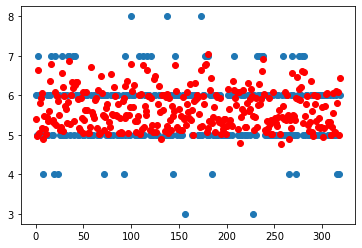

In [ ]:

plt.scatter(y=y_test,x=np.arange(len(y_test)))
plt.scatter(y=y_pred,x=np.arange(len(y_pred)), color='red')
plt.show()

In [ ]:
import shap
explainer = shap.KernelExplainer(model = automl.predict, data = X_test.iloc[:50, :], link = "identity")

In [ ]:
# Set the index of the specific example to explain
X_idx = 0
shap_value_single = explainer.shap_values(X = X_test.iloc[X_idx:X_idx+1,:], nsamples = 100)
X_test.iloc[X_idx:X_idx+1,:]
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values = shap_value_single,
                features = X_test.iloc[X_idx:X_idx+1,:]
                )

In [ ]:
shap_values = explainer.shap_values(X = X_test.iloc[0:50,:], nsamples = 100)

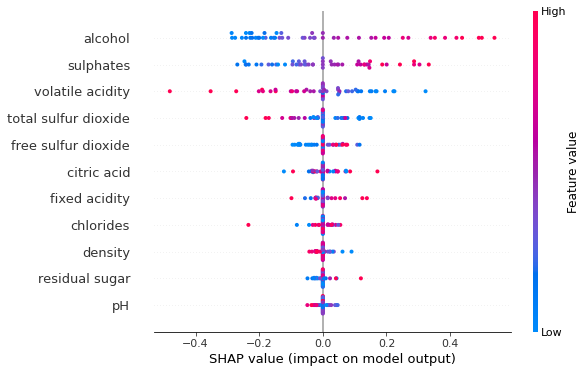

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.summary_plot(shap_values = shap_values,
                  features = X_test.iloc[0:50,:]
                  )